In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
import pandas as pd
pd.DataFrame(data)

NameError: name 'data' is not defined

In [3]:
with fits.open('/Users/ethansilver/Downloads/goods_s_F115W_2018_08_29.fits') as hdul:
    print(hdul.info())
    data3 = hdul[0].data
    header3 = hdul[0].header

Filename: /Users/ethansilver/Downloads/goods_s_F115W_2018_08_29.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   (16160, 14060)   float32   
None


In [4]:
header3

SIMPLE  =                    T / This is a FITS file                            
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                16160 / NUMBER OF ELEMENTS ALONG THIS AXIS             
NAXIS2  =                14060 / NUMBER OF ELEMENTS ALONG THIS AXIS             
EXTEND  =                    T / This file may contain FITS extensions          
EQUINOX =        2000.00000000 / Mean equinox                                   
MJD-OBS =   5.835600000000E+04 / Modified Julian date at start                  
RADESYS = 'ICRS    '           / Astrometric system                             
CTYPE1  = 'RA---TAN'           / WCS projection type for this axis              
CUNIT1  = 'deg     '           / Axis unit                                      
CRVAL1  =   5.316468333333E+01 / World coordinate on this axis                  
CRPIX1  =   9.016000000000E+

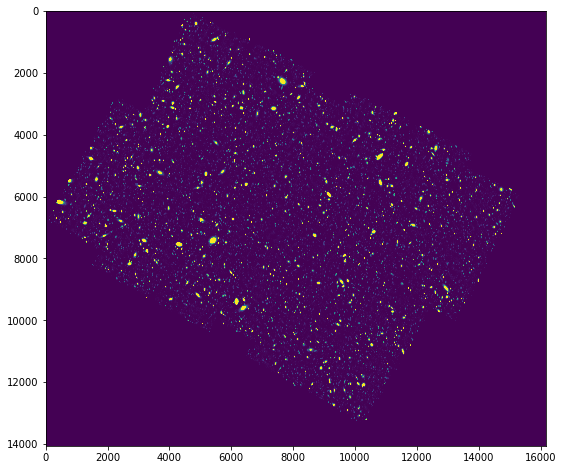

In [5]:
plt.figure(figsize=(10,8))
plt.imshow(data3, vmin=0, vmax=.02)

In [6]:
with fits.open('/Users/ethansilver/Downloads/JADES_SF_mock_r1_v1.1.fits') as hdul:
#     print(hdul.info())
    data = hdul[1].data
    header = hdul[1].header
z_sources = np.logspace(np.log10(max(data['redshift'])), np.log10(min(data['redshift'])), 100)
z_source_means = (z_sources[1:]+z_sources[:-1])/2

In [7]:
header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                  396 / width of table in bytes                        
NAXIS2  =               302515 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   80 / number of columns                              
EXTNAME = 'Joined  '           / table name                                     
TTYPE1  = 'ID      '           / label for column 1                             
TFORM1  = 'J       '           / format for column 1                            
TNULL1  =          -2147483648 / blank value for column 1                       
TTYPE2  = 'RA      '        

In [8]:
data = data[data['RA']<min(data['RA'])+11/60]
data = data[data['DEC']<min(data['DEC'])+11/60]

In [9]:
from astropy.wcs import WCS
w = WCS(header3)
sky = w.pixel_to_world(0, 0)
print(sky)  

<SkyCoord (ICRS): (ra, dec) in deg
    (53.24965723, -27.85978503)>


In [10]:
arg = np.argmax(data['NRC_F210M_fnu'])
ra, dec = data['RA'][arg], data['DEC'][arg]
ra, dec

(53.100033, -27.857176)

In [11]:
i = -6
data_sort = np.sort(data, order='NRC_F210M_fnu')
ra, dec = data_sort['RA'][i], data_sort['DEC'][i]

from astropy.coordinates import SkyCoord
sky = SkyCoord(str(ra)+"d "+str(dec)+"d")
x, y = w.world_to_pixel(sky)
x, y = int(x), int(y)
x, y

(7646, 2271)

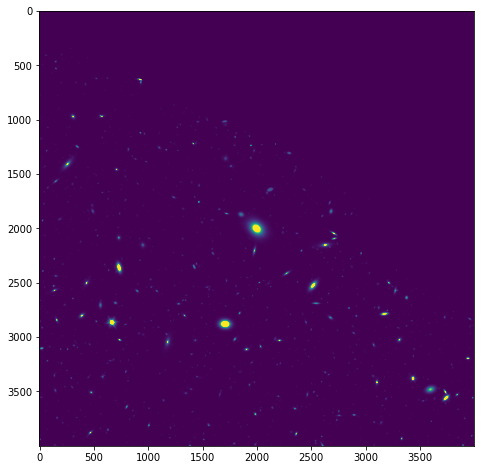

In [12]:
plt.figure(figsize=(10,8))
# plt.imshow(data3[y-2000:y+2000,x-2000:x+2000], vmin=0, vmax=.2)
plt.imshow(data3[y-2000:y+2000,x-2000:x+2000], vmin=0, vmax=.2)

In [13]:
data3.shape

(14060, 16160)

In [14]:
y

2271

In [15]:
x = np.arange(0,data3.shape[0], 1000)
y = np.arange(0,data3.shape[1], 1000)

dec

-27.840885

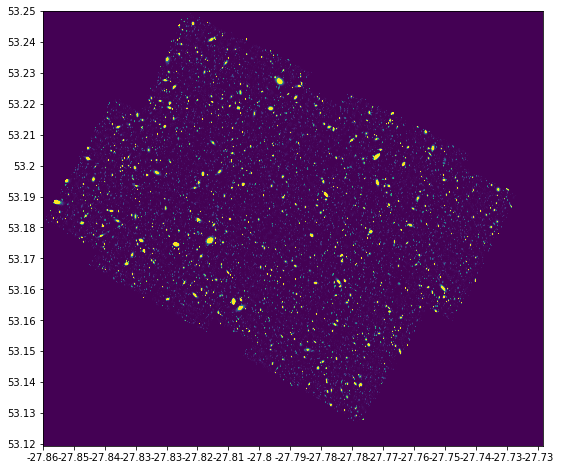

In [16]:
plt.figure(figsize=(10,8))
plt.imshow(data3, vmin=0, vmax=.02)
x = np.arange(0, data3.shape[0], 1000)
y = np.arange(0, data3.shape[1], 1000)
ra = np.round(np.array([w.pixel_to_world(x[i], y[0]).ra.value for i in range(len(x))]), 2)
dec = np.round(np.array([w.pixel_to_world(x[0], y[i]).dec.value for i in range(len(y))]), 2)
plt.xticks(ticks=y, labels=dec)
plt.yticks(ticks=x, labels=ra);

(2977.3315875311155, 13176.447622991276)

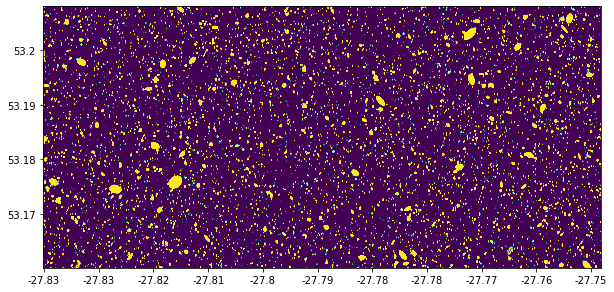

In [118]:
plt.figure(figsize=(10,8))
plt.imshow(data3>5*np.std(bkg), vmin=0, vmax=.02)
x = np.arange(0, data3.shape[0], 1000)
y = np.arange(0, data3.shape[1], 1000)
ra = np.round(np.array([w.pixel_to_world(x[i], y[0]).ra.value for i in range(len(x))]), 2)
dec = np.round(np.array([w.pixel_to_world(x[0], y[i]).dec.value for i in range(len(y))]), 2)
plt.xticks(ticks=y, labels=dec)
plt.yticks(ticks=x, labels=ra);

sky1 = SkyCoord(str(53.165)+"d "+str(-27.835)+"d")
x1, y1 = w.world_to_pixel(sky1)

sky2 = SkyCoord(str(53.21)+"d "+str(-27.75)+"d")
x2, y2 = w.world_to_pixel(sky2)

plt.ylim(x1,x2)
plt.xlim(y1,y2)

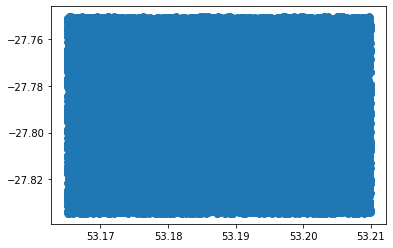

In [19]:
cut = data[data['RA']>53.165]
cut = cut[cut['RA']<53.21]
cut = cut[cut['DEC']<-27.75]
cut = cut[cut['DEC']>-27.835]
plt.scatter(cut['RA'], cut['DEC'])

In [18]:
bkg = data3[5000:5050,8000:8050]
np.std(bkg)

0.0020595375

In [21]:
data3.shape

(14060, 16160)

In [122]:
np.count_nonzero(data>5*np.std(bkg))/data.shape[0]/data.shape[1]

0.018756357196538825

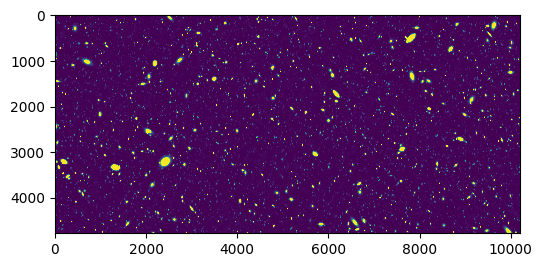

In [121]:
plt.figure(dpi=100)
data = data3[int(x2):int(x1),int(y1):int(y2)]
plt.imshow(data, vmin=0, vmax=0.02)

In [54]:
len(cut['NRC_F210M_fnu']

SyntaxError: unexpected EOF while parsing (<ipython-input-54-d080038517d3>, line 1)

In [115]:
inds = np.argwhere(cut['NRC_F210M_fnu']>1e2)
bright['Re_maj']

0.20276

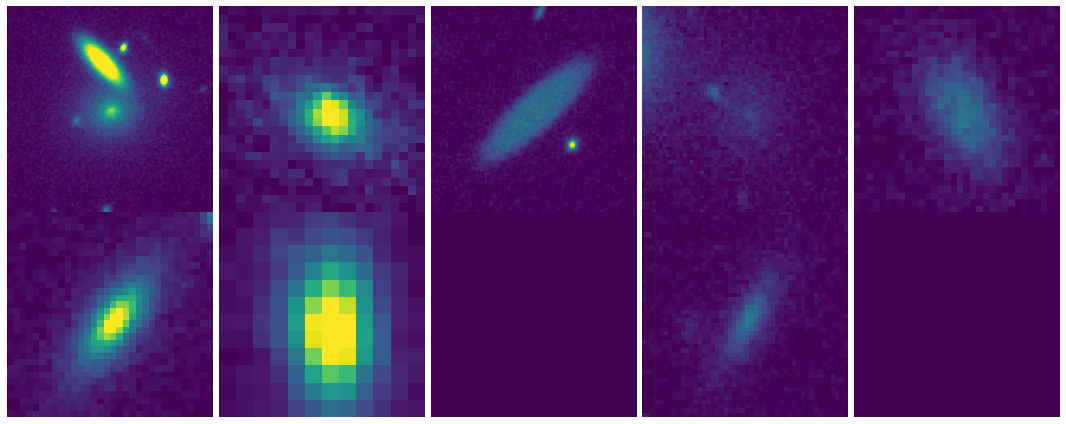

In [135]:
fig, axs=plt.subplots(2,5, figsize=(15,6))
for i in range(5,15):
    j = i-5
    bright = cut[inds[i]][0]
    R = int(bright['Re_maj']/.03)*2

    ra, dec = bright['RA'], bright['DEC']
    sky = SkyCoord(str(ra)+"d "+str(dec)+"d")
    x, y = w.world_to_pixel(sky)
    x, y = int(x), int(y)
    axs[j//5,j%5].imshow(data3[y-R:y+R,x-R:x+R], vmin=0, vmax=.05)
    axs[j//5,j%5].axis('off')
plt.tight_layout()
plt.subplots_adjust(hspace=0,wspace=0)


In [28]:
    bright = cut[inds[i]][0]
    R = int(bright['Re_maj']/.03)*2

    ra, dec = bright['RA'], bright['DEC']
    sky = SkyCoord(str(ra)+"d "+str(dec)+"d")
    x, y = w.world_to_pixel(sky)
    x, y = int(x), int(y)
    axs[j//5,j%5].imshow(data3[y-R:y+R,x-R:x+R], vmin=0, vmax=.05)
    axs[j//5,j%5].axis('off')

NameError: name 'gal' is not defined

In [34]:
gal = data3[y-200:y+200,x-200:x+200]
np.count_nonzero([gal>5*np.std(bkg)])/400**2

0.06733125

In [35]:
plt.scatter(data['RA'], data['DEC'], s=.001)
plt.xlabel('RA')
plt.ylabel('DEC')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices